In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_data=pd.read_csv(r"C:\Users\abhic\Downloads\Malignant-Comments-Classifier-Project--1---1-\Malignant Comments Classifier Project\train.csv")
df_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df_test=pd.read_csv(r"C:\Users\abhic\Downloads\Malignant-Comments-Classifier-Project--1---1-\Malignant Comments Classifier Project\test.csv")
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
df_data.shape

(159571, 8)

In [5]:
df_test.shape

(153164, 2)

In [6]:
df_data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [7]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [10]:
df_data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,07936fbb7f7dec49,You are a dumbass ;/ Even the stupidest of per...
freq,1,1


<AxesSubplot:>

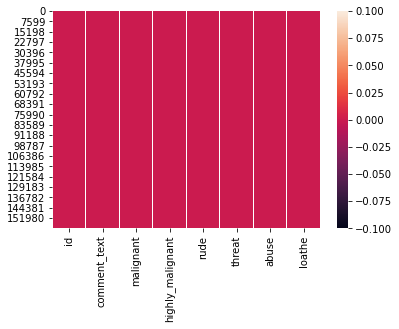

In [12]:
sns.heatmap(df_data.isnull())

<AxesSubplot:>

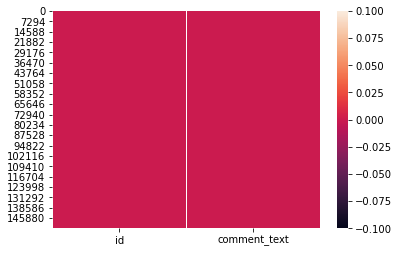

In [13]:
sns.heatmap(df_test.isnull())

In [14]:
dfcorr=df_data.corr()
df_data.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


In [15]:
df_data.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [16]:
df_test.columns

Index(['id', 'comment_text'], dtype='object')

In [17]:
df_data.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [18]:
df_test.dtypes

id              object
comment_text    object
dtype: object

In [19]:
df_data.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


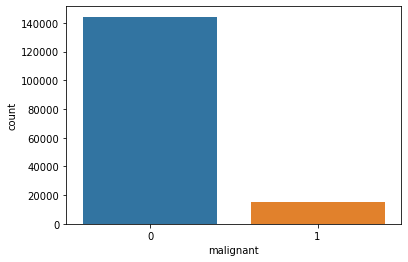

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


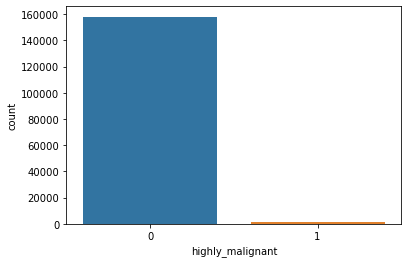

loathe


0    158166
1      1405
Name: loathe, dtype: int64


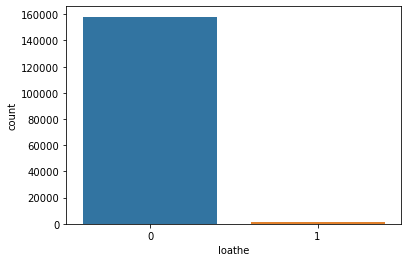

rude


0    151122
1      8449
Name: rude, dtype: int64


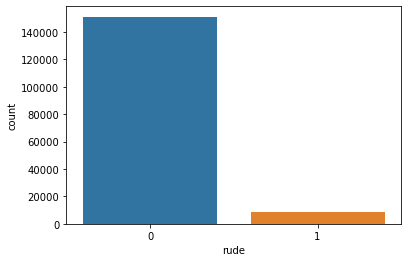

abuse


0    151694
1      7877
Name: abuse, dtype: int64


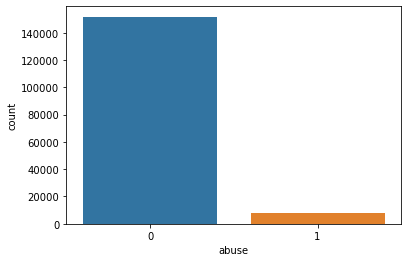

threat


0    159093
1       478
Name: threat, dtype: int64


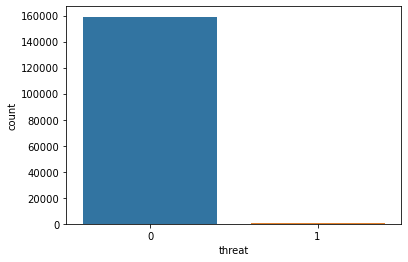

In [20]:
col_name=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col_name:
    print(i)
    print("\n")
    print(df_data[i].value_counts())
    sns.countplot(df_data[i])
    plt.show()

In [21]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string


import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
df_data['length'] = df_data['comment_text'].str.len()
df_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [23]:
df_data['comment_text'] = df_data['comment_text'].str.lower()

In [24]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

In [25]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'£|\$', 'dollers')

In [26]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

In [27]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [28]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'[^\w\d\s]', ' ')

In [29]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'\s+', ' ')

In [30]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [31]:
df_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,d aww he matches this background colour i m se...,0,0,0,0,0,0,112
2,000113f07ec002fd,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,more i can t make any real suggestions on impr...,0,0,0,0,0,0,622
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67


In [32]:
def dictionary(dir):
    emails = [os.path.join(dir,f) for f in os.listdir(dir)]    
    all_words = []       
    for mail in emails:    
        with open(mail) as m:
            for i,line in enumerate(m):
                if i == 2:  
                    words = line.split()
                    all_words += words
    
    dictionary = Counter(all_words)
    
    return dictionary

In [33]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df_data['comment_text'] = df_data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df_data['comment_text'] = df_data['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [34]:
df_data['clean_length'] = df_data.comment_text.str.len()
df_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,168
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,91
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,365
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29


In [35]:
print ('Original Length', df_data.length.sum())
print ('Clean Length', df_data.clean_length.sum())

Original Length 62893130
Clean Length 39966886


In [36]:
! pip install wordcloud

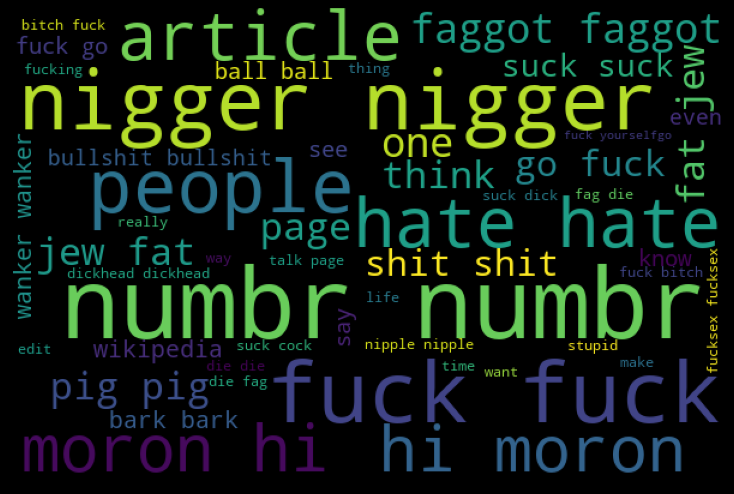

In [37]:
from wordcloud import WordCloud
highlym = df_data['comment_text'][df_data['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(highlym))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

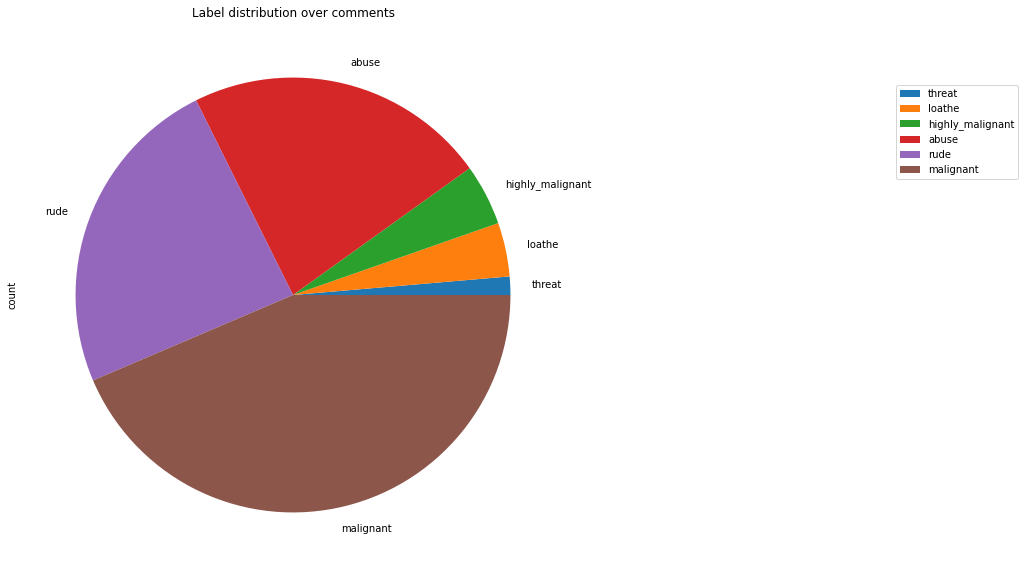

In [38]:
cols_output = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = df_data[cols_output].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.6, 0.8))

In [39]:
target_data = df_data[cols_output]

df_data['bad'] =df_data[cols_output].sum(axis =1)
print(df_data['bad'].value_counts())
df_data['bad'] = df_data['bad'] > 0 
df_data['bad'] = df_data['bad'].astype(int)
print(df_data['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


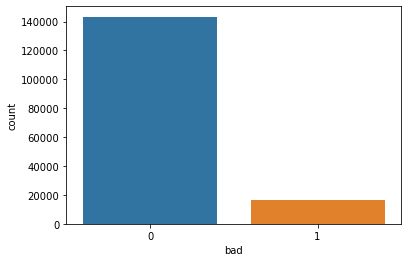

In [40]:
sns.countplot(x="bad" , data = df_data)
plt.show()

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df_data['comment_text'])
x = features

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
y=df_data['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [44]:
y_train.shape,y_test.shape

((127656,), (31915,))

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
df = DecisionTreeClassifier()

In [47]:
df.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
df.score(x_test,y_test)

0.9423155256149146

In [49]:
y_pred = df.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     28671
           1       0.73      0.69      0.71      3244

    accuracy                           0.94     31915
   macro avg       0.85      0.83      0.84     31915
weighted avg       0.94      0.94      0.94     31915



In [52]:
cm=confusion_matrix(y_test,df.predict(x_test))

In [53]:
print(cm)

[[27844   827]
 [ 1014  2230]]


In [54]:
rf = RandomForestClassifier()

In [55]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
rf.score(x_test,y_test)

0.9574181419395269

In [57]:
y_pred = rf.predict(x_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28671
           1       0.87      0.69      0.77      3244

    accuracy                           0.96     31915
   macro avg       0.92      0.84      0.87     31915
weighted avg       0.96      0.96      0.96     31915



In [59]:
cm=confusion_matrix(y_test,df.predict(x_test))

In [60]:
print(cm)

[[27844   827]
 [ 1014  2230]]


In [61]:
lm = LogisticRegression()

In [62]:
lm.fit(x_train,y_train)

LogisticRegression()

In [63]:
lm.score(x_test,y_test)

0.956258812470625

In [64]:
gb = GradientBoostingClassifier()

In [65]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [66]:
gb.score(x_test,y_test)

0.9408115306282312

In [67]:
y_pred = gb.predict(x_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28671
           1       0.96      0.44      0.60      3244

    accuracy                           0.94     31915
   macro avg       0.95      0.72      0.78     31915
weighted avg       0.94      0.94      0.93     31915



In [69]:
cm=confusion_matrix(y_test,df.predict(x_test))

In [70]:
print(cm)

[[27844   827]
 [ 1014  2230]]


In [71]:
ad=AdaBoostClassifier()

In [72]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [73]:
ad.score(x_test,y_test)

0.9459188469371769

In [74]:
y_pred = ad.predict(x_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28671
           1       0.88      0.54      0.67      3244

    accuracy                           0.95     31915
   macro avg       0.92      0.77      0.82     31915
weighted avg       0.94      0.95      0.94     31915



In [76]:
cm=confusion_matrix(y_test,ad.predict(x_test))

In [77]:
print(cm)

[[28438   233]
 [ 1493  1751]]


In [78]:
from sklearn import preprocessing, neighbors

In [79]:
clf = neighbors.KNeighborsClassifier()

In [80]:
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [81]:
clf.score(x_test,y_test)

0.9160896130346232

In [82]:
ET=ExtraTreesClassifier()

In [83]:
ET.fit(x_train,y_train)

ExtraTreesClassifier()

In [84]:
ET.score(x_test,y_test)

0.9580761397462009

In [85]:
y_pred = ET.predict(x_test)

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28671
           1       0.87      0.69      0.77      3244

    accuracy                           0.96     31915
   macro avg       0.92      0.84      0.87     31915
weighted avg       0.96      0.96      0.96     31915



In [87]:
cm=confusion_matrix(y_test,ET.predict(x_test))

In [88]:
print(cm)

[[28343   328]
 [ 1010  2234]]


In [89]:
test_data =tf_vec.fit_transform(df_test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [90]:
predict=rf.predict(test_data)
predict

array([0, 0, 0, ..., 0, 0, 1])

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
cv=cross_val_score(rf, x, y, cv=10, scoring='accuracy').mean()

In [93]:
print('cross validation score :',cv*100)

cross validation score : 95.67653164539684


In [94]:
from sklearn.metrics import f1_score, log_loss, roc_auc_score, roc_curve,auc